In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [41]:
df = pd.read_csv("data/house_prices.csv")
df.columns = [col.lower().capitalize() for col in df.columns]
df.rename(columns={'Furnishing status':'Furnishing_Status','Air conditioning':'Air_Conditioning','Hotwaterheating':'Hot_Water_Heating','Houseage':'House_Age'},inplace=True)

df['Furnishing_Status']= df['Furnishing_Status'].apply(lambda x : x.lower().capitalize() if pd.notna(x) else x)
df.replace({'yes':1,'no':0}, inplace= True)

df.head()

,Price,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hot_Water_Heating,Air_Conditioning,Parking,Prefarea,Furnishing_Status,House_Age
0,4543000.0,4990.0,4.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,Furnished,15.0
1,8080940.0,7000.0,3.0,2.0,4.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,Furnished,11.0
2,8750000.0,4321.0,3.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,Furnished,NaN
3,1890000.0,1700.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Unfurnished,NaN
4,12215000.0,7500.0,4.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,Furnished,NaN


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,789.0,5.406437e+06,2.217827e+06,1750000.0,3640000.0,4893000.0,7210000.0,13300000.0
Area,794.0,5.482997e+03,2.203341e+03,1650.0,3665.0,5310.0,6601.0,16200.0
Bedrooms,785.0,3.048408e+00,7.424454e-01,1.0,3.0,3.0,3.0,6.0
Bathrooms,788.0,1.469543e+00,6.690366e-01,1.0,1.0,1.0,2.0,4.0
Stories,794.0,1.935768e+00,9.513541e-01,1.0,1.0,2.0,2.0,4.0
Mainroad,793.0,8.865069e-01,3.173947e-01,0.0,1.0,1.0,1.0,1.0
Guestroom,786.0,2.099237e-01,4.075132e-01,0.0,0.0,0.0,0.0,1.0
Basement,787.0,3.557814e-01,4.790539e-01,0.0,0.0,0.0,1.0,1.0
Hot_Water_Heating,791.0,6.321113e-02,2.434963e-01,0.0,0.0,0.0,0.0,1.0
Air_Conditioning,794.0,3.942065e-01,4.889876e-01,0.0,0.0,0.0,1.0,1.0


In [42]:
df.drop(labels = ["House_Age"], axis=1, inplace = True, errors="ignore")
df.dropna(how="any").shape


(661, 13)

In [7]:
from pandas_profiling import ProfileReport


# Créer un rapport de profilage
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

# Générer les widgets du rapport
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [43]:
# Imputation Area
import statsmodels.api as smf

data = df.copy()
data_train = data.dropna(subset = ["Area"])
model = smf.formula.ols(formula="Area ~ Bedrooms + Bathrooms + Stories + Mainroad + Air_Conditioning + Parking + Prefarea ", data=data_train).fit()
print(model.summary())

for col in ["Bedrooms", "Bathrooms", "Stories", "Mainroad", "Air_Conditioning", "Parking", "Prefarea"]:
    data[col].fillna(data[col].median(), inplace = True)

x_miss = data.loc[data["Area"].isna() == True, ["Bedrooms", "Bathrooms", "Stories", "Mainroad", "Air_Conditioning", "Parking", "Prefarea"]]
data.loc[data["Area"].isna() == True, "Area"] = model.predict(x_miss)
data_train


                            OLS Regression Results                            
Dep. Variable:                   Area   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     34.53
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           2.25e-41
Time:                        18:35:02   Log-Likelihood:                -6274.5
No. Observations:                 701   AIC:                         1.257e+04
Df Residuals:                     693   BIC:                         1.260e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2488.6976    359.031  

,Price,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hot_Water_Heating,Air_Conditioning,Parking,Prefarea,Furnishing_Status
0,4543000.0,4990.0,4.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,Furnished
1,8080940.0,7000.0,3.0,2.0,4.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,Furnished
2,8750000.0,4321.0,3.0,2.0,2.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,Furnished
3,1890000.0,1700.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Unfurnished
4,12215000.0,7500.0,4.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0,Furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,2653000.0,4000.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Unfurnished
805,8855000.0,6421.0,3.0,3.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,Semi-furnished
806,3010000.0,3750.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Unfurnished
807,4340000.0,1905.0,5.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Semi-furnished


In [54]:
data2 = df.copy()
data2["Area"].fillna(data2["Area"].median(), inplace = True)

<Axes: xlabel='Area', ylabel='Count'>

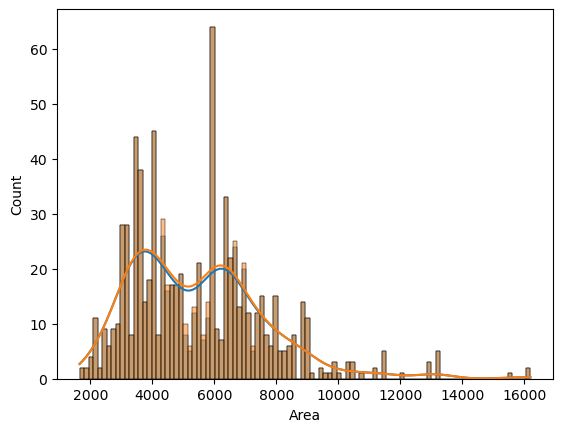

In [63]:
sns.histplot(df["Area"], bins=100, kde=True)
sns.histplot(data["Area"], bins=100, kde = True)
# sns.histplot(data2["Area"], bins=30, kde = True)

In [53]:
df["Area"].isna().sum()

15